<a href="https://colab.research.google.com/github/Yael0706/IA-ACTIVITIES/blob/main/assignment_6_FFNN-EYMG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load libraries.

In [ ]:
#assigmen 6-Artificial Neural Network: feedforward.
#Edgar Yael Moreno Garcia
#id: 2021283
#Tuesday N4
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import random

Load data.

In [ ]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()
print(f"Train data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")

Train data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


Data preprocessing.

In [ ]:
train_data = train_data / 255.0
test_data = test_data / 255.0
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

Model selection and training.

In [ ]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)
history = model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8535 - loss: 0.4772 - val_accuracy: 0.9559 - val_loss: 0.1461
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9658 - loss: 0.1180 - val_accuracy: 0.9669 - val_loss: 0.1059
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9769 - loss: 0.0750 - val_accuracy: 0.9696 - val_loss: 0.1049
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9818 - loss: 0.0563 - val_accuracy: 0.9731 - val_loss: 0.0988
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9863 - loss: 0.0438 - val_accuracy: 0.9740 - val_loss: 0.0951
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9879 - loss: 0.0347 - val_accuracy: 0.9743 - val_loss: 0.0932
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9918 - loss: 0.0256 - val_accuracy: 0.9750 - val_loss: 0.1008
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9927 - loss: 0.0233

Model testing.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9723 - loss: 0.0970
Model accuracy on test set: 0.98
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


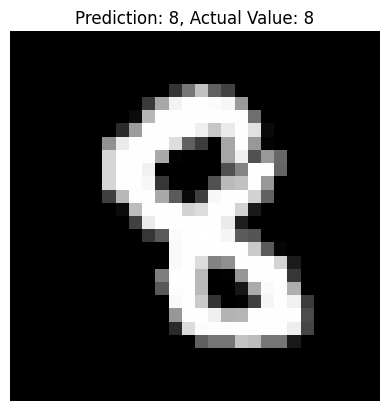

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


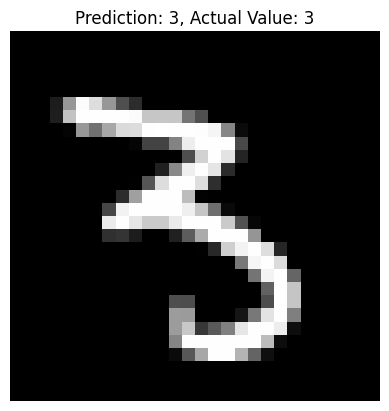

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


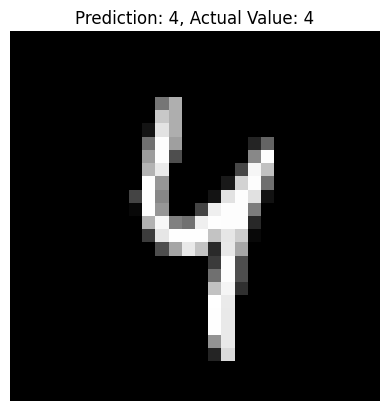

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


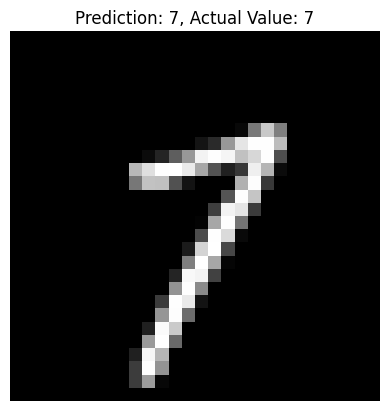

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


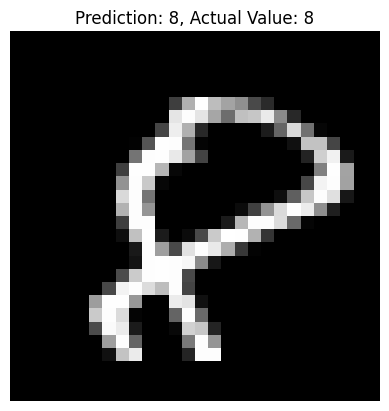

In [ ]:
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f'Model accuracy on test set: {test_accuracy:.2f}')
for _ in range(5):
    i = random.randint(0, len(test_data) - 1)
    img = test_data[i]
    actual_label = np.argmax(test_labels[i])
    prediction = np.argmax(model.predict(np.expand_dims(img, axis=0)))

    plt.imshow(img, cmap='gray')
    plt.title(f'Prediction: {prediction}, Actual Value: {actual_label}')
    plt.axis('off')
    plt.show()
